<h1>
به نام خدا

تمرین کامپیوتری شماره 6

علی ممتحن 810100213

</h1>

In [2]:
!pip install hazm
!pip installu uvicorn
!pip install python-multipart
!pip install kaleido
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 27.3 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=e6acb91fe7a0e508a3ddf86711bd7e5e20970a297251ac6dbd6d9c593fa17f17
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

ERROR: unknown command "installu" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 878.3 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.8 MB/s eta 0:00

In [34]:
import numpy
import hazm
import gensim
import os
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import sklearn
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
test_data_path = '/content/drive/MyDrive/test.csv'
train_data_path = '/content/drive/MyDrive/train.csv'

In [35]:

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)




#1
<p style="text-align:center">
در فرایند خوشه بندی وقتی تعداد داده های دو کلاس با هم برابر نباشد در الگوریتم knn مرکز هر خوشه و در dbscan ناحیه آن اشتباه برآورد می شود مثلا یکی ناحیه خیلی بزرگ تری گرفته و دیگری ناحیه کوچک تری یا کلاس بندی مربوط به کلاس با داده های کمتر حاوی مقدار زیادی از داده های کلاس دیگر می شود زیرا الگوریتم سعی میکند به صورت برابر داده ها را کلاس بندی کند همچنین تشخیص داده های نویز سخت تر می شود

برای حل این مشکل می توانیم یا با ساخت داده های مصنوعی برای کلاس با داده کمتر تعدادشان را برابر کنیم یا به صورت بالعکس از تعداد داده های کلاس با داده های بیشتر کم کنیم.یا می توانیم از از الکوریتم هایی استفاده کنیم که کلاس ها در آن وزن می گیرند که با وزن دهی آن ها اثر نابرابری داده را از بین ببریم
</p>

In [36]:
print(train_data.keys())
key_list = list(train_data.keys())
print(key_list)
CONTENT = key_list[1]
LABEL = key_list[0]
print(train_data[LABEL])

Index(['label', 'content'], dtype='object')
['label', 'content']
0            فناوری
1             ورزشی
2             حوادث
3            فناوری
4             سلامت
           ...     
8995          حوادث
8996          ورزشی
8997    فرهنگی/هنری
8998          حوادث
8999         فناوری
Name: label, Length: 9000, dtype: object


In [37]:
class_column = train_data.columns[0]

# Use a for loop to count occurrences of each class
class_number_list = {}
class_index = {}
class_list = []
i =0
for class_name, count in train_data[class_column].value_counts().items():
    class_number_list[class_name] = count
    class_index[class_name] = i
    i += 1
    class_list.append(class_name)

print(class_number_list)

{'فناوری': 1500, 'ورزشی': 1500, 'حوادث': 1500, 'سلامت': 1500, 'سیاسی': 1500, 'فرهنگی/هنری': 1500}


In [38]:
normalizer = hazm.Normalizer()
tokenizer = hazm.WordTokenizer()
lemmatizer = hazm.Lemmatizer()
stemmer = hazm.Stemmer()
stop_word_list = set(hazm.stopwords_list())
punctuations_set = set(['،', ':', '.', '؛', ')','(', '"', '»', '«', '{', '}', '[', ']', '!', '؟', '?', ';', ','])
# x = normalizer.normalize(train_data[CONTENT][0])

# x = hazm.word_tokenize(x)
# print(x)


<h1> فاز اول

انواع پیش پردازش ها

<p style="text-align:center">
normalize:

این تابع متن راآماده برای پیش پردازش میکند مانند فعالیت هایی مانند از بین بردن اسپیس و تبدیل اعداد انگلیسی به فارسی

tokenize:
این تابع کلمات داخل متن را توکن بندی کرده تا کاراکتر های وایت اسپیس حذف شوند و متن آماده پردازش قرار گیرد
که دو نوع توکنایز داریم یکی به صورت جمله جلمه و یکی به صورت کلمه
کلمه

stop words:
کلماتی که در خوشه بندی تاثیر ندارند و معمولا برای اتصال جملات به کار میروند مانند زیرا اما و ... که حذف آن ها سرعت ما را در پردازش افزایش می دهد

delete punctuations:

حذف علامات نگارشی مانند ویرگول و نقطه که در تحلیل زبان تاثیر چندانی ندارند

</p>




#2
<p style="text-align:center">
lemmatization:
در این روش کلمات را به ریشه اصلی شان برمیگردانیم برای مثال کلمه می رود و رفت هر دو به ریشه اصلی بازگشته با این کار توکنی که به هر کدام اختصاص می یابد یکی میشود

stemming:

در این روش صرفا اضافات کلمات را حذف می کنیم و آن را به صورت اصلیشان بر میگردانیم برای مثال تر ترین و ضمایر متصل و علامات جمع حذف می شود

</p>

<p dir=rtl style="text-align:center">
ما از پیش پردازش استمینگ استفاده نکردیم زیرا تاثیر زیادی نداشته و به کار ما نمی آید همچنین پردازش حذف علائم نگارشی با افزوده شدنش کیفیت مدل را به صورت چشم گیری افزایش داده است

</p>

In [39]:
def stemming(sen):
  return [stemmer.stem(i) for i in sen]


def lemmatization(sen):
  return [lemmatizer.lemmatize(word).split('#', 1)[0] for word in sen]

def delete_stop_word(sen):
  return [i for i in sen if i not in stop_word_list]

def remove_punctuations(x):
    return [i for i in x if i not in punctuations_set]



In [40]:


def imp_pre_proc(train_data):
  train_data[CONTENT] = train_data['content'].apply(normalizer.normalize)
  train_data[CONTENT] = train_data['content'].apply(tokenizer.tokenize)
  train_data['content'] = train_data['content'].apply(remove_punctuations)
  train_data[CONTENT] = train_data['content'].apply(delete_stop_word)
  train_data[CONTENT] = train_data['content'].apply(lemmatization)
  # train_data[CONTENT] = train_data['content'].apply(stemming)


print(train_data['content'][0])
imp_pre_proc(train_data)
imp_pre_proc(test_data)
print(train_data['content'][0])
all_data = pd.concat([train_data , test_data])


گزارش های منتشر شده حاکی از آن است که کاربران تلگرام در مناطقی از جهان همچون اروپا و خاورمیانه با مشکل مواجه شده اند. به گزارش ایسنا، به نقل از تلگرام، دقایقی پیش پیام رسان تلگرام در صفحه توییتر خود اعلام کرد که دسترسی کاربران این اپلیکیشن در اروپا و خاورمیانه با مشکل مواجه شده است. طبق این پیام، به نظر می رسد که منشا این اختلالات از ظهر امروز، پنج شنبه، خارجی و از سوی خود این پیام رسان بوده است و ارتباطی با داخل کشور ندارد. این پیام رسان در این خصوص عنوان کرده است که متخصصان تلگرام از زمانی که متوجه چنین اختلالی شده اند، در حال بررسی و برطرف کردن مشکل مربوطه بوده و امید است به زودی این اختلال رفع شود و کاربران به حساب های کاربری خود در تلگرام دسترسی یابند.
['گزارش', 'منتشر', 'حاکی', 'کاربر', 'تلگرام', 'مناطقی', 'جهان', 'اروپا', 'خاورمیانه', 'مشکل', 'شد', 'گزارش', 'ایسنا', 'نقل', 'تلگرام', 'دقایق', 'پیام\u200cرسان', 'تلگرام', 'صفحه', 'توییتر', 'اعلام', 'دسترسی', 'کاربر', 'اپلیکیشن', 'اروپا', 'خاورمیانه', 'مشکل', 'پیام', 'منشا', 'اختلالات', 'ظهر', 'امروز', 'پنج\u200cشنبه', 'خارجی', 'پیا

<h1> فاز دوم فرآیند مسئله و ارزیابی

#3
<p style="text-align:center">
دلیل آن این است که الگوریتم های کلاس بندی و کلا ماشین لرنینگ با محاسبات ریاضی و اعداد کار می کنند و نمی توانیم مستقیم با متن و کلمات کار کنیم پس باید آن ها را به اعداد یا بردار یا ماتریس و تنسور تبدیل کرده تا بتوان روی آن ها پردازش کرد

 یکی از این روش ها بردار ویژگی است که برای کلمات
یک سری ویژگی در نظر میگیریم و هر کلمه در هر ویژگی یک امتیازی میگیرد این بردار به نحوی است که نسبت کلمات به هم مانند دنیای واقعی باشد
</p>

#4
<p style="text-align:center">
word2vec:

این عمل به هر کلمه یک وکتور از اعداد که هر عدد نشان دهنده ویژگی هایی است که کلمه دارند است که باعث می شود بتوانیم روی آن پردازش انجام دهیم همچنین باید نسبت کلمات به هم حفظ شود مثلا اگر دو کلمه شبیه همن بردار آن ها نیز شبیه باشند یا مثلا نسبت بردار ملکه به پادشاه باید شبیه نسبت بردار مرد به زن باشد

doc2vec:

مانند قسمت قبل تفاوت این است مه بردار را برای
یک داکیومنت می سازیم

</p>



In [42]:
print(train_data['content'][0])
tag_data = [TaggedDocument(words=words, tags=[str(idx)]) for idx, words in enumerate(train_data['content'])]
model = Doc2Vec(tag_data , vector_size=8 , window=5 , workers=4 , min_count = 1 , epochs = 25)


['گزارش', 'منتشر', 'حاکی', 'کاربر', 'تلگرام', 'مناطقی', 'جهان', 'اروپا', 'خاورمیانه', 'مشکل', 'شد', 'گزارش', 'ایسنا', 'نقل', 'تلگرام', 'دقایق', 'پیام\u200cرسان', 'تلگرام', 'صفحه', 'توییتر', 'اعلام', 'دسترسی', 'کاربر', 'اپلیکیشن', 'اروپا', 'خاورمیانه', 'مشکل', 'پیام', 'منشا', 'اختلالات', 'ظهر', 'امروز', 'پنج\u200cشنبه', 'خارجی', 'پیام\u200cرسان', 'ارتباطی', 'داخل', 'کشور', 'پیام\u200cرسان', 'عنوان', 'متخصص', 'تلگرام', 'زمانی', 'متوجه', 'اختلال', 'شد', 'بررسی', 'برطرف', 'مشکل', 'مربوطه', 'امید', 'زودی', 'اختلال', 'رفع', 'کاربر', 'حساب', 'کاربری', 'تلگرام', 'دسترسی', 'یابید']


In [43]:
train_vec_list = []
test_vec_list = []

for sent in train_data[CONTENT]:
  vec = model.infer_vector(sent)
  train_vec_list.append(vec)


for sent in test_data[CONTENT]:
  vec = model.infer_vector(sent)
  test_vec_list.append(vec)


all_vec_list = train_vec_list + test_vec_list

In [44]:
# print(test_vec_list)
print(len(test_vec_list) , len(train_vec_list) , len(all_vec_list))

1115 9000 10115


#5
<p style="text-align:center">
kmeans:

دراین روش ابتدا تعداد کلاستر ها را مشخص کرده بعد به صورت رندوم به تعداد کا نقطه که مرکز کلاستر ها هستند مشخص کرده و بعد هر نقطه به هر مرکز نزدیک تر باشد جزو آن کلاستر است این بعد نقاط را با توجه به اینکه این نقاط چقدر خوب توانسته اند دسته بندی کنند را آپدیت می کنیم

dbscan:

در این روش   ما هر دفعه در یک کلاستر به یک شعاعی چک میکنیم که به تعداد کافی در این شعاع داده وجود دارد یا خیر اگر داشت آن قسمت را جزو کلاستر فعلی قرار می دهیم که دو هایپر پارامتر داریم شعاع و حداقل تعداد عنصر در آن شعاع

</p>


<p style="text-align:center">
در روش کامین نواحی کلاستر ها به صورت کروی یا دایره ای بیشتر تعیین می شود در حالیکه روش دیگر اینگونه نیست زیرا بر اساس چگالی است

روش دی بی اسکن برای داده هایی که تعداد کلاس های آن معلوم نیست معمولا بهتر است زیرا برای کامین لازم است تعداد کلاس ها را بدانیم
همچنین کامین در داده های بزرگ سریع تر از روش دیگر است اما آسیب پذیری بیشتری تسبت به دی بی اسکن به نویز دارد

</p>

k= 6  silhouette= 0.22760087   homogeneity= 0.4857557008881052
k= 12  silhouette= 0.18949784   homogeneity= 0.5338189419424941
k= 18  silhouette= 0.18711372   homogeneity= 0.6099854401591615
k= 24  silhouette= 0.19301187   homogeneity= 0.6397138878429095
k= 30  silhouette= 0.18791729   homogeneity= 0.6414721536275284
k= 36  silhouette= 0.16852632   homogeneity= 0.6468037451831301
[1 0 1 ... 1 2 4]


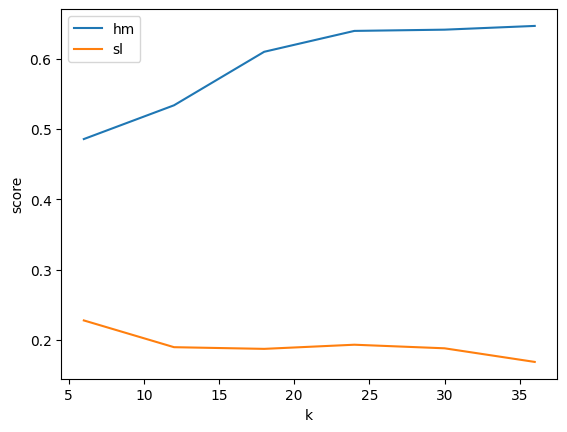

In [58]:
# k-means
#9
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
data_standard = StandardScaler().fit_transform(all_vec_list)
pred_list_kmean = []

true_label_list_all = []

hm_list = []
sl_list = []
k_list =  []
for l in all_data['label']:
  true_label_list_all.append(class_list.index(l) + 1)

for  k in range(6 , 42 , 6):
  k_list.append(k)
  km_model = KMeans(n_clusters= k , random_state=42 , n_init  = 10)
  km_model.fit(all_vec_list)
  pred = km_model.predict(all_vec_list)

  pred_list_kmean.append(pred)
  # knn_score = adjusted_rand_score(true_label_list_all , pred)
  # print('k =',k , 'score:' , knn_score)
  hm = metrics.homogeneity_score(true_label_list_all, pred)
  sl = metrics.silhouette_score(all_vec_list , pred, metric='euclidean')
  hm_list.append(hm)
  sl_list.append(sl)
  print('k=',k , ' silhouette=' , sl , '  homogeneity=' ,hm  )

plt.plot(k_list , hm_list , label = 'hm')
plt.plot(k_list , sl_list , label = 'sl')

plt.xlabel('k')
plt.ylabel('score')


plt.legend()


print(pred_list_kmean[0])
plt.show()

<p dir=rtl style="text-align:center">
طبق نمودار می بینیم که برای امتیاز هوموجنی افزایش تعداد کا ها آن را بهبود می دهد اما در دیگری این افزایش تاثیر منفی داشته و از آن کاسته است

</p>

In [46]:
#dbscan
#9

pred_list_dbscan = []
for i in range(5 , 30):
  eps = i * 0.1
  max_hm = 0
  max_sl = 0
  max_sample = -1;
  for min_samples in range(5, 15):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    pred = dbscan.fit_predict(all_vec_list)
    # print(pred)
    pred_list_dbscan.append(pred)

    hm = metrics.homogeneity_score(true_label_list_all, pred)
    sl = metrics.silhouette_score(all_vec_list , pred, metric='euclidean')
    if(hm > max_hm):
      max_hm = hm
      max_sl = sl
      max_sample = min_samples

  print('eps=' ,eps, ' min_sam=', max_sample , ' silhouette=' , max_sl , '  homogeneity=' ,max_hm  )

# print(pred_list_dbscan[0])
# print(data_standard)

eps= 0.5  min_sam= 5  silhouette= -0.3206997   homogeneity= 0.007123500083688647
eps= 0.6000000000000001  min_sam= 5  silhouette= -0.30792457   homogeneity= 0.013835250925264296
eps= 0.7000000000000001  min_sam= 11  silhouette= -0.22882761   homogeneity= 0.01353561897692633
eps= 0.8  min_sam= 5  silhouette= -0.29864898   homogeneity= 0.01814192457209523
eps= 0.9  min_sam= 5  silhouette= -0.20306613   homogeneity= 0.026145503340564365
eps= 1.0  min_sam= 5  silhouette= -0.22976981   homogeneity= 0.034705499564453984
eps= 1.1  min_sam= 5  silhouette= -0.26834577   homogeneity= 0.04671082761634316
eps= 1.2000000000000002  min_sam= 5  silhouette= -0.2239811   homogeneity= 0.054871585833078836
eps= 1.3  min_sam= 5  silhouette= -0.23322593   homogeneity= 0.06022979390127473
eps= 1.4000000000000001  min_sam= 5  silhouette= -0.1676047   homogeneity= 0.05710621037902989
eps= 1.5  min_sam= 5  silhouette= -0.15925804   homogeneity= 0.060532436274793155
eps= 1.6  min_sam= 5  silhouette= -0.19526145

<p dir=rtl style="text-align:center">

</p>

#6
<p dir=rtl style="text-align:center">
همین طور که در پایین می بینیم خروجی الگوریتم kmean به نسبت نتیجه بهتری داشته است در مقیاس homogenyاما در مقیاس دیگر الگوریتم dbscan بهتر بوده دلیل آن به نحوه کارکرد این دو الگوریتم بر میگردد به هر حال الگوریتم kmean برای این مسئله مناسب تر بوده است
</p>

In [47]:
#6
dbscan = DBSCAN(eps=1.5 , min_samples=5)
km_model = KMeans(n_clusters= 12 , random_state=42 , n_init  = 10)
km_model.fit(data_standard)
km_pred = km_model.predict(data_standard)
db_pred = dbscan.fit_predict(data_standard)
km_hm = metrics.homogeneity_score(true_label_list_all , km_pred)
km_sl = metrics.silhouette_score(all_vec_list , km_pred, metric='euclidean')

db_hm = metrics.homogeneity_score(true_label_list_all, db_pred)
db_sl = metrics.silhouette_score(all_vec_list , db_pred, metric='euclidean')

print("kmean ->  homogeneity:" , km_hm  , '   silhouette:' ,  km_sl)
print("dbscan ->  homogeneity:" , db_hm  , '   silhouette:' ,  db_sl)



kmean ->  homogeneity: 0.5111968749427891    silhouette: 0.18895485
dbscan ->  homogeneity: 0.007072681826832459    silhouette: 0.287259


<h1> فاز 3

#7
<p dir=rtl style="text-align:center">
در این روش ابتدا داده ها را نرمالایز می کنیم بعد ماتریس کواریانس را برای ویژگی ها را حساب می کنیم تا وابستگی ویژگی ها را نسبت به هم بیابیم بعد از این عمل بردار ویژه ی ماتریس کواریانس را می یابیم و مقادیر آن را حساب کرده و بیشترین آن ها راحساب می کنیم حالا دیتا ها را بر اساس مقادیر ویژه بدست آمده آپدیت می کنیم تا دیتای جدید بدون تغیر واریانس و کاهش بعد یافته بدست آید
</p>

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standard)

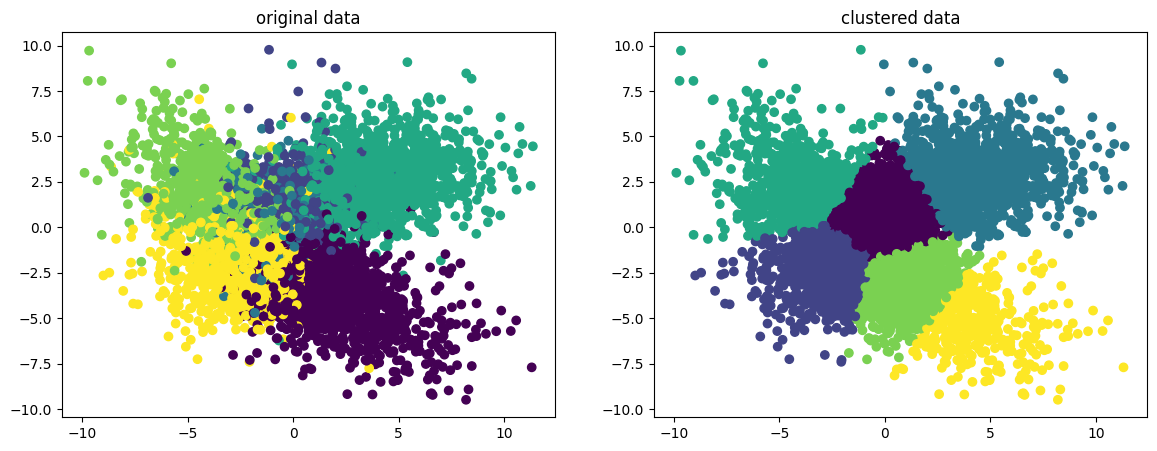

In [57]:
import matplotlib.pyplot as plt
all_data['index'] = all_data['label'].apply(lambda x : class_index[x])
# print(all_data)
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(data_pca)
pred = kmeans.predict(data_pca)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=all_data['index'], cmap='viridis')
axs[1].scatter(data_pca[:, 0], data_pca[:, 1], c=pred, cmap='viridis')

axs[0].title.set_text('original data')
axs[1].title.set_text('clustered data')
plt.show()


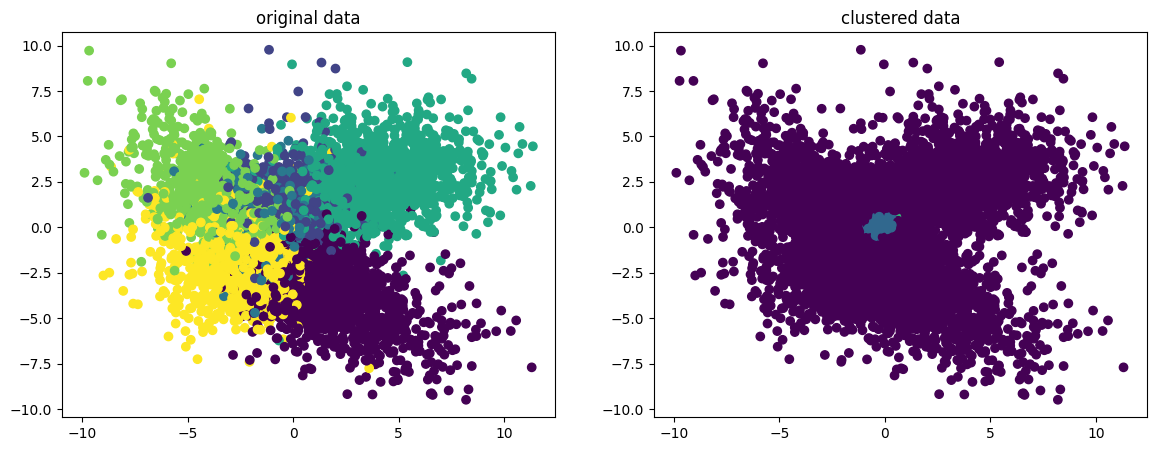

In [56]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(all_vec_list)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

dbscan = DBSCAN(eps=0.1, min_samples=40)
pred = dbscan.fit_predict(data_pca)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=all_data['index'], cmap='viridis')
axs[1].scatter(data_pca[:, 0], data_pca[:, 1], c=pred, cmap='viridis')

axs[0].title.set_text('original data')
axs[1].title.set_text('clustered data')
plt.show()


<p dir=rtl style="text-align:center">
همین طور که میبینیم الگوریتم کامین به نسبت خوب عمل کرده است و توانسته دیتا ها را تا حدی جدا کند اما الگوریتم دی بی اسکن چون دنبال نواحی چگال است و کل داده ی کاهش بعد داده شده ما تقریبا در یک ناجیه چگال است نتوانسته به خوبی جداسازی کند و عملا اکثر داده ها را در یک کلاس قرار داده است

</p>

#8

<p dir=rtl style="text-align:center">
homogenity:

این الگوریتم چک میکند که چقدر کلاس های واقعی ما با کلاس های پیش بینی شده تطابق دارد

silhouette:

این روش می آید رابطه بین نقاط داخل هر کلاستر را می یابد و چگالی آن را چک می کند که چقدر خوب انتخاب شده اند
</p>

#9
<p dir=rtl style="text-align:center">
این نتایج بالا هنگام ترین محاسبه شده است
</p>

#10

<p dir=rtl style="text-align:center">

در هر دو روش با امتحان کردن هایپر پارامتر های مختلف برای مثال
در کامین تعداد کلاس ها و در دی بی اسکن تعداد سمپل و شعاع را در حالات مختلف امتحان می کنیم که ببینیم کدام بهتر است
همچنین می توانیم با چند بار اجرا کردن الگوریتم آن را نقاط شروع مختلف را چک کنیم و بهترین ها را انتخاب کنیم

</p>